# 06/05/2021: Atividade 03 - Análise Exploratória de Dados (Aula complementar)

In [1]:
import numpy as np
import pandas as pd

## Questão 1

In [2]:
data = pd.DataFrame({
    'Name': [
        'João das Neves',
        'Daniela Targaryen',
        'Luke Caminhante do Ceu',
        'Carolina Coralina',
        np.nan
    ],
    'ID': [
        1111,
        np.nan,
        3333,
        4444,
        5555
    ],
    'Type': [
        np.nan,
        'Doctorate',
        np.nan,
        'MSc',
        'MSc'
    ],
    'Mean Grade': [
        8.0,
        np.nan,
        8.0,
        9.8,
        5.0
    ]
})

data

,Name,ID,Type,Mean Grade
0,João das Neves,1111.0,NaN,8.0
1,Daniela Targaryen,NaN,Doctorate,NaN
2,Luke Caminhante do Ceu,3333.0,NaN,8.0
3,Carolina Coralina,4444.0,MSc,9.8
4,NaN,5555.0,MSc,5.0


In [3]:
data.dropna(axis=0, how='any', subset=['ID', 'Type', 'Mean Grade'])
# Errado pois não remove os valores vazios da coluna 'Name'

,Name,ID,Type,Mean Grade
3,Carolina Coralina,4444.0,MSc,9.8
4,NaN,5555.0,MSc,5.0


In [4]:
data.dropna(axis=1, how='all')
# Errado pois remove colunas que tenham todos registros vazios

,Name,ID,Type,Mean Grade
0,João das Neves,1111.0,NaN,8.0
1,Daniela Targaryen,NaN,Doctorate,NaN
2,Luke Caminhante do Ceu,3333.0,NaN,8.0
3,Carolina Coralina,4444.0,MSc,9.8
4,NaN,5555.0,MSc,5.0


In [5]:
data.dropna(how='all', subset=['ID', 'Type', 'Mean Grade'])
# Errado pois não considera todas colunas e porque só remove registros que tenham todos valores vazios

,Name,ID,Type,Mean Grade
0,João das Neves,1111.0,NaN,8.0
1,Daniela Targaryen,NaN,Doctorate,NaN
2,Luke Caminhante do Ceu,3333.0,NaN,8.0
3,Carolina Coralina,4444.0,MSc,9.8
4,NaN,5555.0,MSc,5.0


In [6]:
data.dropna()
# Correto

,Name,ID,Type,Mean Grade
3,Carolina Coralina,4444.0,MSc,9.8


In [7]:
data.dropna(axis=1, subset=['ID', 'Type', 'Mean Grade'])
# Tudo errado

KeyError: ['ID', 'Type', 'Mean Grade']

## Questão 2

In [8]:
data = pd.DataFrame({
    'Nome': ['Titanic', 'O Poderoso Chefão', 'Avatar', 'Cinderela Baiana', 'Titanic'],
    'Genero': ['Romance', 'Drama', 'Aventura', 'Terror', 'Drama'],
    'Nota': [4.6, 4.9, 4.0, 5.0, 4.9]
})

data

,Nome,Genero,Nota
0,Titanic,Romance,4.6
1,O Poderoso Chefão,Drama,4.9
2,Avatar,Aventura,4.0
3,Cinderela Baiana,Terror,5.0
4,Titanic,Drama,4.9


In [9]:
data.drop_duplicates(keep='last')
# Errado pois remove apenas registros com todas colunas iguais

,Nome,Genero,Nota
0,Titanic,Romance,4.6
1,O Poderoso Chefão,Drama,4.9
2,Avatar,Aventura,4.0
3,Cinderela Baiana,Terror,5.0
4,Titanic,Drama,4.9


In [10]:
data.drop(data[data.duplicated(subset='Nome', keep='last')].index)
# Correto

,Nome,Genero,Nota
1,O Poderoso Chefão,Drama,4.9
2,Avatar,Aventura,4.0
3,Cinderela Baiana,Terror,5.0
4,Titanic,Drama,4.9


In [11]:
data.drop_duplicates(by='Nome', keep='last')
# Sintaxe errada

TypeError: drop_duplicates() got an unexpected keyword argument 'by'

In [12]:
try:
    del data.duplicated(subset='Nome', keep='last')
except:
    print('Erro de execução:')
# 'del' é usado para remover objetos, e não funções

SyntaxError: cannot delete function call (<ipython-input-12-c3963b590c25>, line 2)

In [13]:
data.drop_duplicates(subset=['Nome'], keep='last')
# Correto

,Nome,Genero,Nota
1,O Poderoso Chefão,Drama,4.9
2,Avatar,Aventura,4.0
3,Cinderela Baiana,Terror,5.0
4,Titanic,Drama,4.9


In [14]:
data.drop_duplicates(subset='Nome', last=True)
# Sintaxe incorreta

TypeError: drop_duplicates() got an unexpected keyword argument 'last'

In [15]:
data

,Nome,Genero,Nota
0,Titanic,Romance,4.6
1,O Poderoso Chefão,Drama,4.9
2,Avatar,Aventura,4.0
3,Cinderela Baiana,Terror,5.0
4,Titanic,Drama,4.9


# 06/05/2021: Atividade 04 - Análise Exploratória de Dados

In [16]:
import pandas as pd

## Questão 2

In [17]:
data = pd.DataFrame({
    'Nome': ['Martinica', 'Alessandro', 'Ruberbal', 'Rosalina', 'Rinalva', 'Jucinara', 'Carlinhos', 'Taciano'],
    'Nota': [7.8, 8.5, 9.0, 4.5, 9.9, 5.2, 6.6, 8.1],
    'Idade': [17, 21, 18, 18, 34, 68, 17, 22]
})
data

,Nome,Nota,Idade
0,Martinica,7.8,17
1,Alessandro,8.5,21
2,Ruberbal,9.0,18
3,Rosalina,4.5,18
4,Rinalva,9.9,34
5,Jucinara,5.2,68
6,Carlinhos,6.6,17
7,Taciano,8.1,22


In [18]:
data.mean()

Nota      7.450
Idade    26.875
dtype: float64

In [19]:
data.loc[:, 'Nota'].mean()
# a) Correto

7.450000000000001

In [20]:
data.iloc[:, 'Nota'].mean()
# b) Erro de sintaxe

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [21]:
data['Nota'].mean()
# c) Correto

7.450000000000001

In [22]:
data.mean()['Nota']
# d) Correto

7.450000000000001

In [23]:
data[:, 'Nota'].mean()
# e) Erro de sintaxe

TypeError: '(slice(None, None, None), 'Nota')' is an invalid key

## Questão 3

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.DataFrame({
    'X': [10.0, 8.5, 16.8, 11.2, 17.8, 5.4, 21.6, 9.6, 14.0, 13.5],
    'Y': [12.5, 11.1, 22.3, 15.4, 25.3, 8.4, 30.6, 25.5, 16.3, 16.8],
    'Z': [22.0, 18.0, 19.5, 15.5, 12.2, 11.6, 7.4, 0.8, 30.5, 22.7]
}, index=range(1,11))
data

,X,Y,Z
1,10.0,12.5,22.0
2,8.5,11.1,18.0
3,16.8,22.3,19.5
4,11.2,15.4,15.5
5,17.8,25.3,12.2
6,5.4,8.4,11.6
7,21.6,30.6,7.4
8,9.6,25.5,0.8
9,14.0,16.3,30.5
10,13.5,16.8,22.7


In [42]:
data.corr()

,X,Y,Z
X,1.000000,0.815785,-0.005369
Y,0.815785,1.000000,-0.493838
Z,-0.005369,-0.493838,1.000000


<AxesSubplot:>

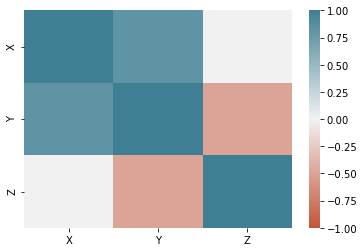

In [43]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

In [44]:
data.describe()

,X,Y,Z
count,10.000000,10.000000,10.000000
mean,12.840000,18.420000,16.020000
std,4.879025,7.196728,8.475035
min,5.400000,8.400000,0.800000
25%,9.700000,13.225000,11.750000
50%,12.350000,16.550000,16.750000
75%,16.100000,24.550000,21.375000
max,21.600000,30.600000,30.500000


<AxesSubplot:>

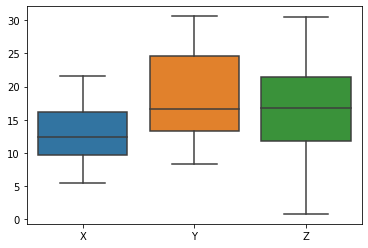

In [45]:
sns.boxplot(data=data)

<AxesSubplot:xlabel='X', ylabel='Y'>

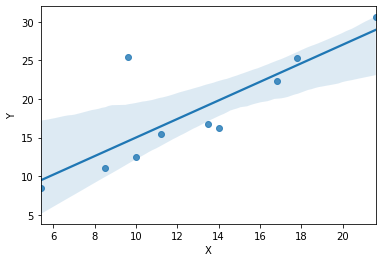

In [46]:
sns.regplot(data=data, x='X', y='Y')

<AxesSubplot:xlabel='X', ylabel='Z'>

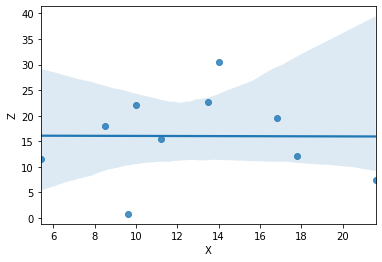

In [47]:
sns.regplot(data=data, x='X', y='Z')